# Results interpretation

## Brief overview

## Imports & global variables

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# Read all results from CSV files
model_results = dict(
    A=pd.read_csv('../results/results_Model_bootstrapped_A.csv'),
    B=pd.read_csv('../results/results_Model_bootstrapped_B.csv'),
    C=pd.read_csv('../results/results_Model_bootstrapped_C.csv'),
    D=pd.read_csv('../results/results_Model_bootstrapped_D.csv'),
    E=pd.read_csv('../results/results_Model_bootstrapped_E.csv'),
    F=pd.read_csv('../results/results_Model_bootstrapped_F.csv'),
    G=pd.read_csv('../results/results_Model_bootstrapped_G.csv'),
    H=pd.read_csv('../results/results_Model_bootstrapped_H.csv'),
    I=pd.read_csv('../results/results_Model_bootstrapped_I.csv'),
    J=pd.read_csv('../results/results_Model_bootstrapped_J.csv'),
    K=pd.read_csv('../results/results_Model_bootstrapped_K.csv')
)

# Set seaborn theme and color palette
sns.set_theme(style="whitegrid", palette="pastel")

## Data processing

In [4]:
best_results = list()
all_results_df = pd.DataFrame()
for model in model_results.keys():
    # Samples for last epoch
    samples = model_results[model][model_results[model]['Epoch'] == 50]
    sd_values = samples.std(ddof=1).to_dict()
    # Get best results for model
    best_result = samples.median().to_dict()
    best_result['Model'] = model
    best_result['HitRate@k [SD]'] = sd_values['HitRate@k']
    best_result['MRR@k [SD]'] = sd_values['MRR@k']
    best_results.append(best_result)
    
    # Concatenate to all results
    model_results_df = model_results[model].copy()
    model_results_df['Model'] = [model] * len(model_results_df)
    all_results_df = pd.concat([all_results_df, model_results_df])

# Transform to data frame
best_results_df = pd.DataFrame(best_results)
all_results_df

,Epoch,Train Loss,Test Loss,Precision@k,Recall@k,MAP@k,MRR@k,NDCG@k,HitRate@k,Bootstrap ID,Model
0,1,0.692994,0.693129,0.006747,0.030468,0.010315,0.017696,0.017608,0.054084,0,A
1,2,0.692857,0.693107,0.018069,0.067267,0.026442,0.046688,0.043004,0.122392,0,A
2,3,0.692646,0.693075,0.023449,0.083811,0.035126,0.060164,0.055334,0.149060,0,A
3,4,0.692351,0.693031,0.024834,0.088958,0.038189,0.065346,0.059389,0.156452,0,A
4,5,0.691964,0.692973,0.024993,0.089198,0.038720,0.066816,0.060035,0.157949,0,A
...,...,...,...,...,...,...,...,...,...,...,...
495,46,0.001737,0.099150,0.063942,0.207156,0.098567,0.153567,0.144429,0.336867,9,K
496,47,0.001685,0.098742,0.064045,0.207456,0.098257,0.152855,0.144256,0.337796,9,K
497,48,0.001710,0.098521,0.064026,0.207778,0.098254,0.152960,0.144317,0.337889,9,K
498,49,0.001565,0.098369,0.063952,0.207513,0.098723,0.153677,0.144628,0.337053,9,K


In [5]:
best_results_df

,Epoch,Train Loss,Test Loss,Precision@k,Recall@k,MAP@k,MRR@k,NDCG@k,HitRate@k,Bootstrap ID,Model,HitRate@k [SD],MRR@k [SD]
0,50.0,0.506653,0.665470,0.023023,0.083118,0.036689,0.066224,0.056975,0.150362,4.5,A,0.001990,0.001033
1,50.0,0.001612,0.243199,0.041535,0.120028,0.052434,0.096589,0.083618,0.228547,4.5,B,0.006474,0.003353
2,50.0,0.002159,0.102096,0.066104,0.214357,0.112481,0.176437,0.158592,0.349131,4.5,C,0.004045,0.001584
3,50.0,0.001249,0.247983,0.051899,0.154270,0.071507,0.124234,0.109754,0.280595,4.5,D,0.006218,0.002399
4,50.0,0.383588,0.427673,0.059786,0.185279,0.096433,0.155614,0.137505,0.310638,4.5,E,0.003710,0.001807
5,50.0,0.366331,0.499569,0.045323,0.135029,0.064060,0.113982,0.097864,0.250280,4.5,F,0.003315,0.001958
6,50.0,0.005603,3.683544,0.009721,0.026981,0.009901,0.023135,0.018159,0.067361,4.5,G,0.003098,0.001741
7,50.0,0.005291,3.618118,0.009789,0.027005,0.009913,0.022872,0.018055,0.066073,4.5,H,0.002264,0.000833
8,50.0,0.002889,0.087568,0.069845,0.226419,0.122391,0.190282,0.170676,0.363586,4.5,I,0.005136,0.002860
9,50.0,0.001632,0.097344,0.060580,0.191859,0.090790,0.144995,0.134308,0.320710,4.5,J,0.004582,0.002072


## Model performance table

In [6]:
best_results_df['Epoch'] = best_results_df['Epoch'].astype(int)
best_results_df['Train Loss'] = best_results_df['Train Loss'].round(3)
best_results_df['Test Loss'] = best_results_df['Test Loss'].round(3)
best_results_df['Precision@k'] = 100 * best_results_df['Precision@k'].round(3)
best_results_df['Recall@k'] = 100 * best_results_df['Recall@k'].round(3)
best_results_df['MAP@k'] = 100 * best_results_df['MAP@k'].round(3)
best_results_df['MRR@k'] = 100 * best_results_df['MRR@k'].round(3)
best_results_df['NDCG@k'] = 100 * best_results_df['NDCG@k'].round(3)
best_results_df['HitRate@k'] = 100 * best_results_df['HitRate@k'].round(3)
best_results_df['HitRate@k [SD]'] = 100 * best_results_df['HitRate@k [SD]'].round(3)
best_results_df['MRR@k [SD]'] = 100 * best_results_df['MRR@k [SD]'].round(3)
best_results_df[['Model', 'MRR@k', 'MRR@k [SD]', 'HitRate@k', 'HitRate@k [SD]']]

,Model,MRR@k,MRR@k [SD],HitRate@k,HitRate@k [SD]
0,A,6.6,0.1,15.0,0.2
1,B,9.7,0.3,22.9,0.6
2,C,17.6,0.2,34.9,0.4
3,D,12.4,0.2,28.1,0.6
4,E,15.6,0.2,31.1,0.4
5,F,11.4,0.2,25.0,0.3
6,G,2.3,0.2,6.7,0.3
7,H,2.3,0.1,6.6,0.2
8,I,19.0,0.3,36.4,0.5
9,J,14.5,0.2,32.1,0.5


## Loss curve

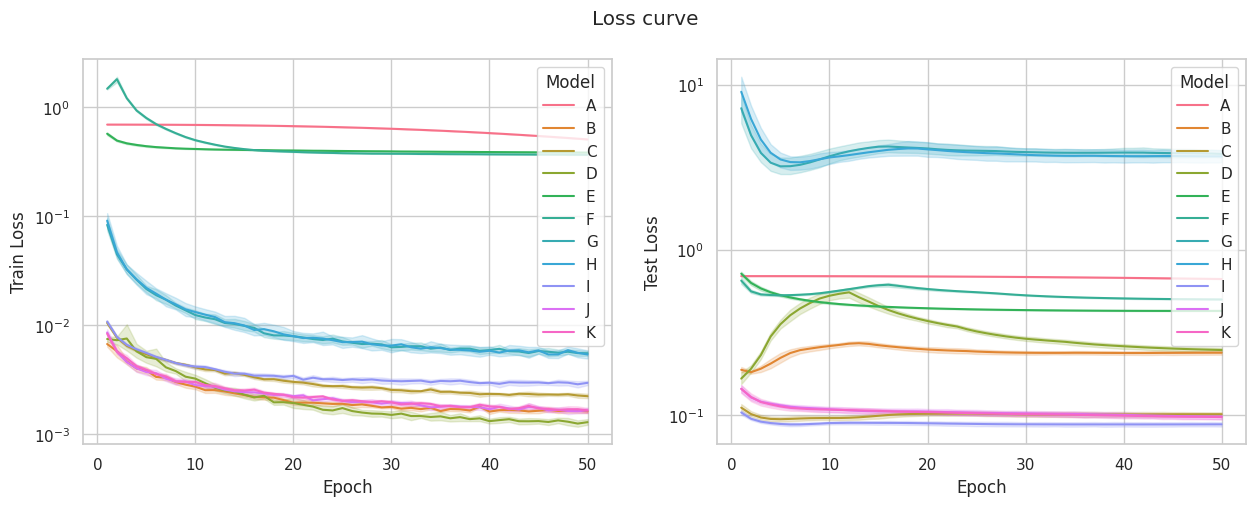

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Generate loss curve
hue_order = all_results_df['Model'].unique()

# Train loss
sns.lineplot(data=all_results_df, 
              x='Epoch',
              y='Train Loss',
              hue='Model',
              hue_order=hue_order,
              ax=axs[0])
axs[0].set_yscale('log')

# Test loss
sns.lineplot(data=all_results_df, 
              x='Epoch',
              y='Test Loss',
              hue='Model',
              hue_order=hue_order,
              ax=axs[1])
axs[1].set_yscale('log')
plt.suptitle('Loss curve')
plt.savefig('../results/figures/ablation_loss_curve.png')
plt.show()

## Model evaluation metrics

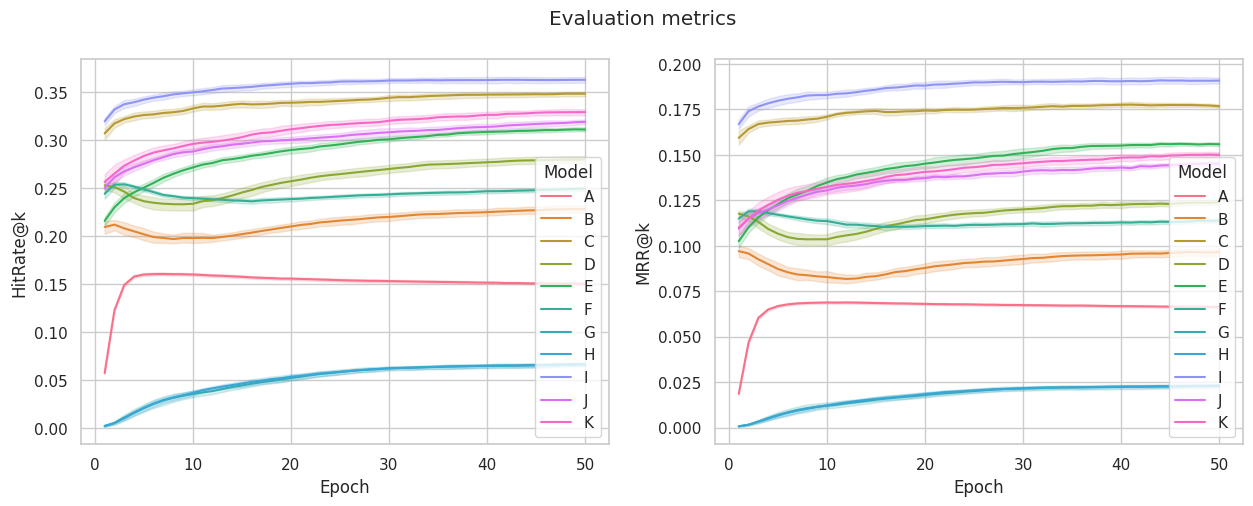

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Generate loss curve
hue_order = all_results_df['Model'].unique()

# HitRate@k
sns.lineplot(data=all_results_df, 
              x='Epoch',
              y='HitRate@k',
              hue='Model',
              hue_order=hue_order,
              ax=axs[0])
# axs[0].set_yscale('log')

# MRR@k
sns.lineplot(data=all_results_df, 
              x='Epoch',
              y='MRR@k',
              hue='Model',
              hue_order=hue_order,
              ax=axs[1])
# axs[1].set_yscale('log')
plt.savefig('../results/figures/ablation_performance.png')
plt.suptitle('Evaluation metrics')
plt.show()

## Top model visualization

In [14]:
top_model = 'I'
top_model_results_df = all_results_df[all_results_df['Model'] == top_model].copy()
top_model_results_df['Train'] = top_model_results_df['Train Loss']
top_model_results_df['Test'] = top_model_results_df['Test Loss']

top_model_loss_df  = top_model_results_df.melt(id_vars=['Epoch'], 
                                                   value_vars=['Train Loss', 'Test Loss'],
                                                   var_name='Loss', 
                                                   value_name='Loss value')
top_model_performance_df  = top_model_results_df.melt(id_vars=['Epoch'], 
                                                   value_vars=['Precision@k', 'Recall@k', 'MAP@k', 'MRR@k', 'NDCG@k', 'HitRate@k'],
                                                   var_name='Performance metric', 
                                                   value_name='Performance value')


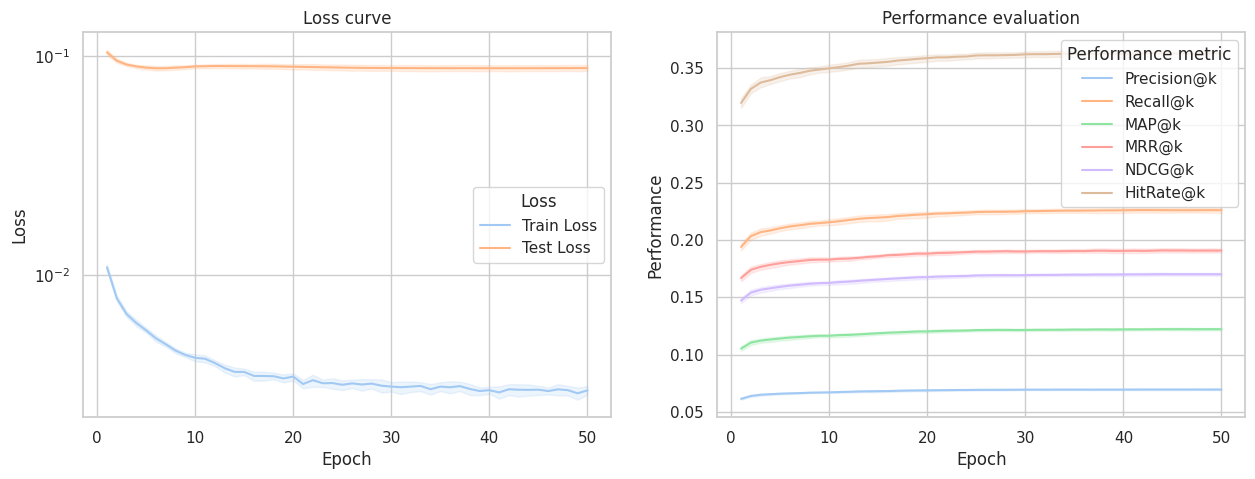

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loss plot
sns.lineplot(data=top_model_loss_df, 
             x='Epoch', 
             y='Loss value', 
             hue='Loss', 
            ax=axs[0])
axs[0].set_title("Loss curve")
axs[0].set_yscale('log')
axs[0].set_ylabel('Loss')

# Loss plot
sns.lineplot(data=top_model_performance_df, 
             x='Epoch', 
             y='Performance value', 
             hue='Performance metric', 
            ax=axs[1])
axs[1].set_title("Performance evaluation")
axs[1].set_ylabel('Performance')
plt.savefig('../results/figures/ablation_top_performer.png')
plt.show()